In [615]:
### Import necessary libraries and Data

In [702]:
import numpy as np
import pandas as pd
from scipy.stats import zscore

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.model_selection import train_test_split


plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [756]:
# import the data
credit = pd.read_excel('Credit Card Customer Data.xlsx')

In [704]:
# get number of columns and rows in raw data
credit.shape

(660, 7)

In [705]:
credit.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [706]:
# get summary statistics of data
credit.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.00,660.00,660.00,660.00,660.00,660.00,660.00
mean,330.50,"55,141.44","34,574.24",4.71,2.40,2.61,3.58
std,190.67,"25,627.77","37,625.49",2.17,1.63,2.94,2.87
min,1.00,"11,265.00","3,000.00",1.00,0.00,0.00,0.00
25%,165.75,"33,825.25","10,000.00",3.00,1.00,1.00,1.00
50%,330.50,"53,874.50","18,000.00",5.00,2.00,2.00,3.00
75%,495.25,"77,202.50","48,000.00",6.00,4.00,4.00,5.00
max,660.00,"99,843.00","200,000.00",10.00,5.00,15.00,10.00


In [707]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [708]:
# check for missing values
credit.isnull().all()

Sl_No                  False
Customer Key           False
Avg_Credit_Limit       False
Total_Credit_Cards     False
Total_visits_bank      False
Total_visits_online    False
Total_calls_made       False
dtype: bool

In [709]:
# check unique values in the attributes
credit.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [710]:
# view skewness of numerical variables
credit.skew() 

# most of the variables are balanced except "Total_calls_made" and "Average Credit Limit"

Sl_No                 0.00
Customer Key          0.05
Avg_Credit_Limit      2.20
Total_Credit_Cards    0.14
Total_visits_bank     0.14
Total_visits_online   2.23
Total_calls_made      0.66
dtype: float64

### Univariate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002EB9DF086C8>,
      dtype=object)

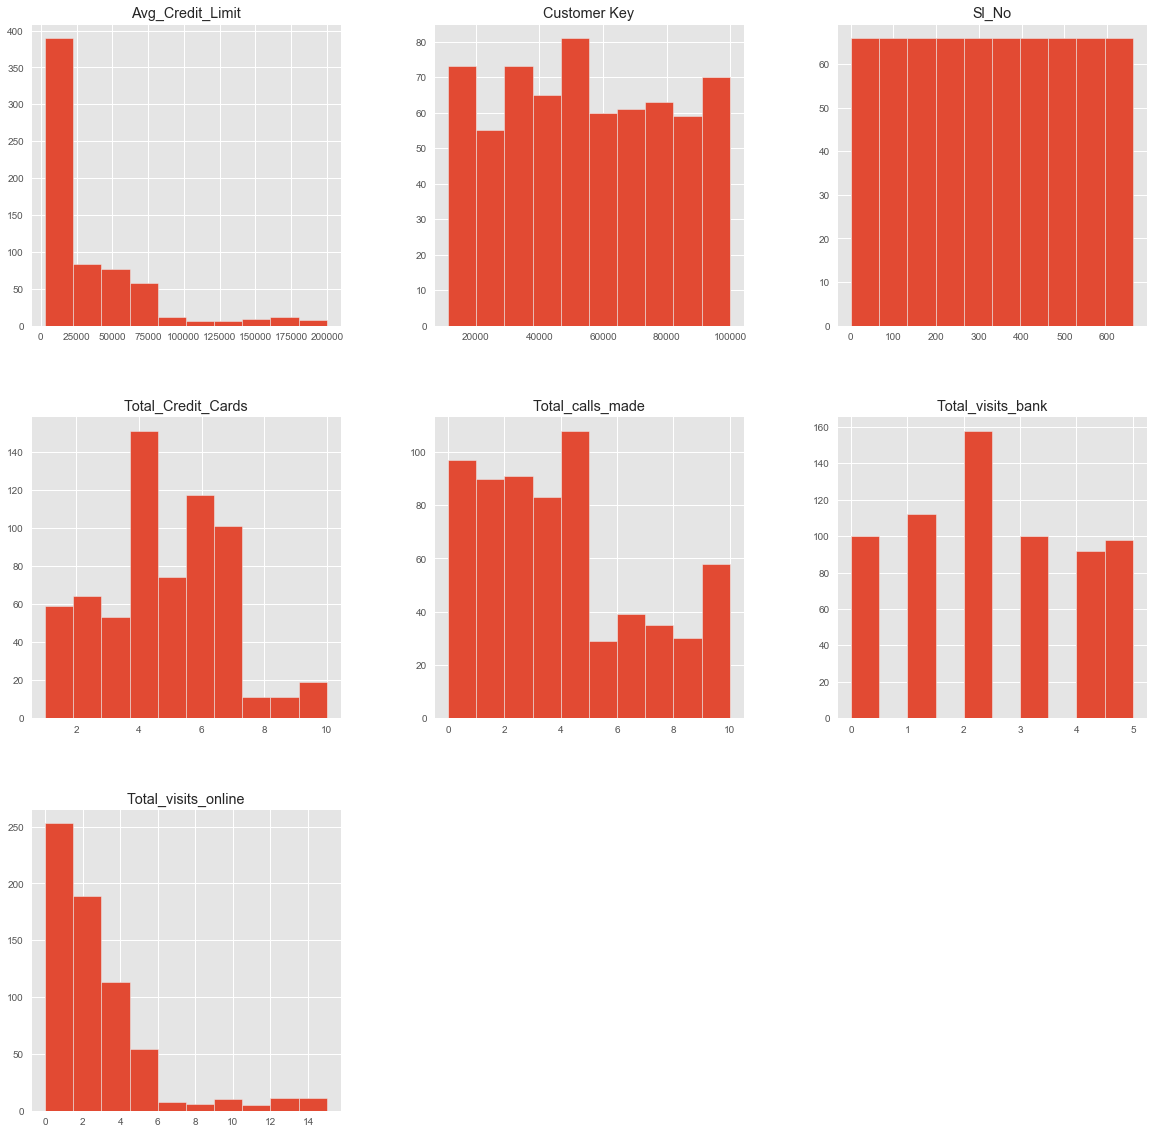

In [711]:
# plot the distributions of the numerical variables
import matplotlib.pyplot as plt
%matplotlib inline

credit.hist(figsize=(20,20))

# The skewness in "Total_calls_made" and "Average Credit Limit" can be visualised

In [712]:
### Boxplot shows that there are outliers in "Total_calls_made" and "Average Credit Limit" variables

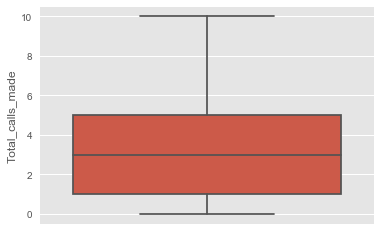

In [713]:
sns.boxplot(y = credit['Total_calls_made']);

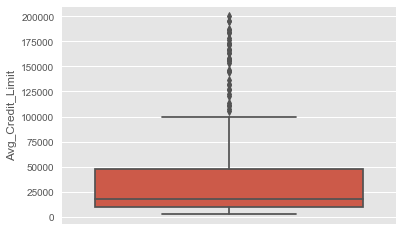

In [714]:
sns.boxplot(y = credit['Avg_Credit_Limit']);

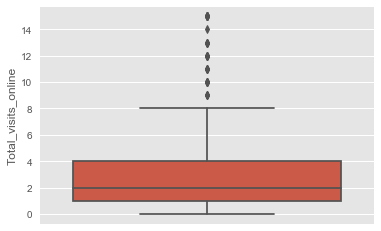

In [715]:
sns.boxplot(y = credit['Total_visits_online']);

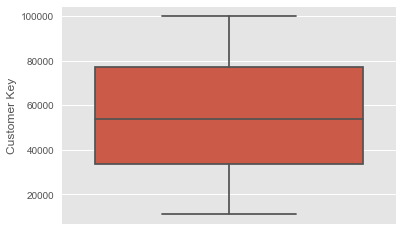

In [716]:
sns.boxplot(y = credit['Customer Key']);

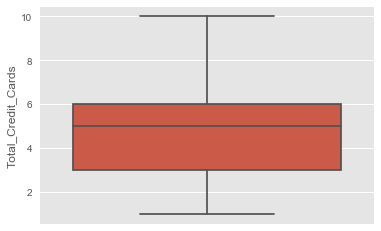

In [717]:
sns.boxplot(y = credit['Total_Credit_Cards']);

In [718]:
#Z-score is used applied to dataset to normalise the scale of the variables and handle the outliers present in some
creditScaled=credit.apply(zscore)

### Bivariate Analysis

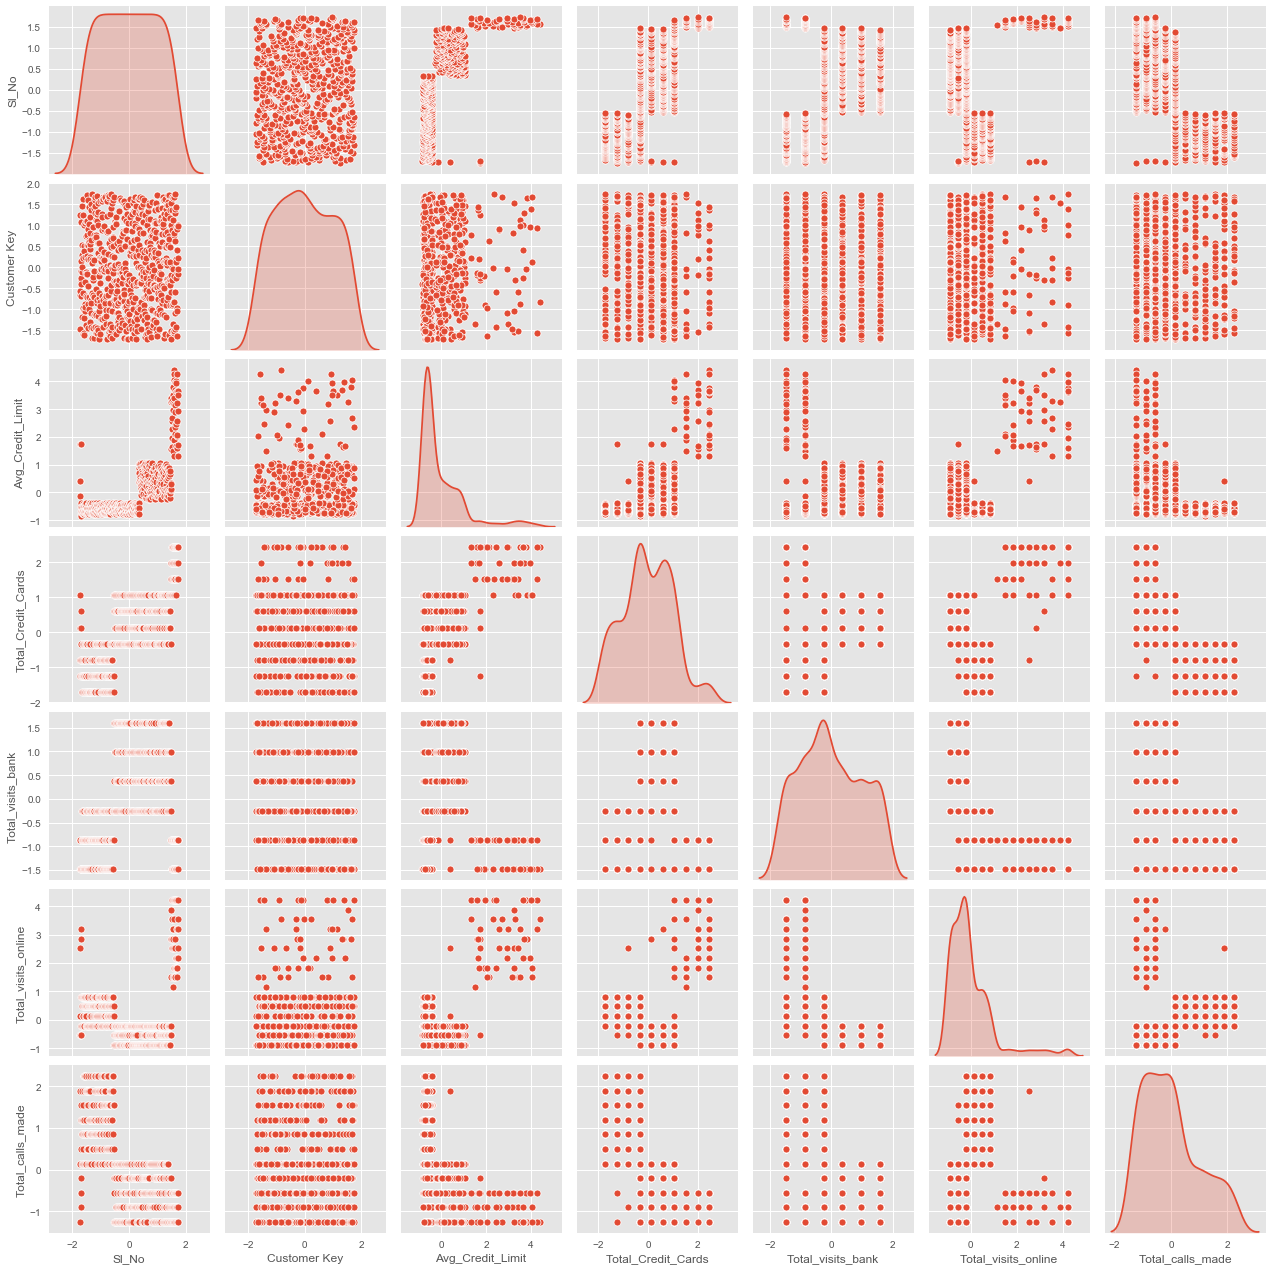

In [719]:
sns.pairplot(creditScaled,diag_kind='kde')

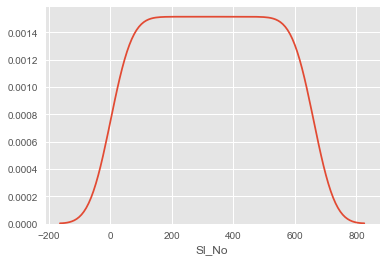

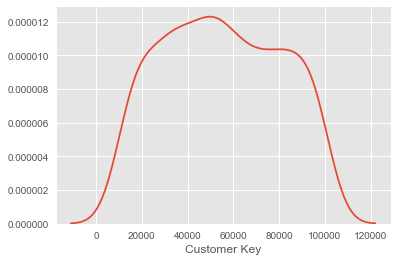

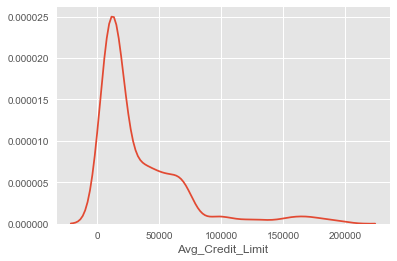

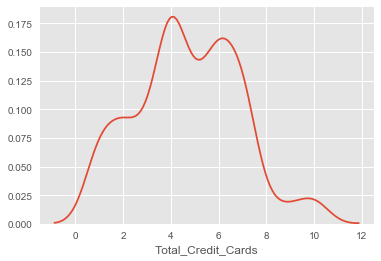

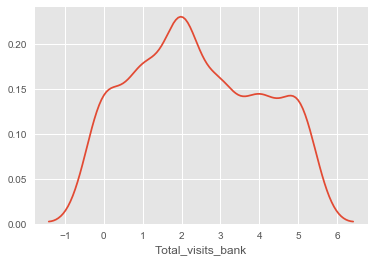

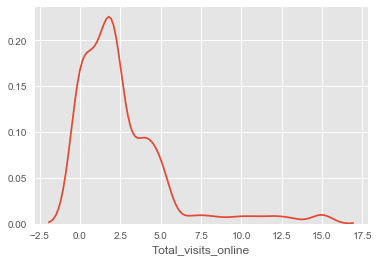

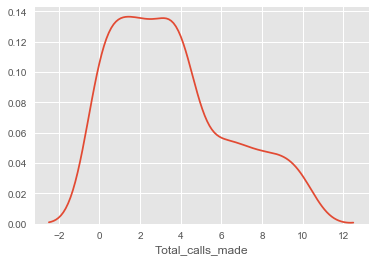

In [720]:
# KDE for all the features
import seaborn as sns

for i in credit.columns[credit.columns!='GROUP']:
    sns.distplot(credit[i],hist=False,)
    plt.show()

Most of the features indicate 3 clusters

In [790]:
# compares the dataset before and after normalisation
credit.head()
creditScaled.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-1.73,1.25,1.74,-1.25,-0.86,-0.55,-1.25
1,-1.72,-0.65,0.41,-0.79,-1.47,2.52,1.89
2,-1.72,-1.48,0.41,1.06,-0.86,0.13,0.15
3,-1.71,-0.57,-0.12,0.14,-0.86,-0.55,0.15
4,-1.71,-0.30,1.74,0.60,-1.47,3.20,-0.20


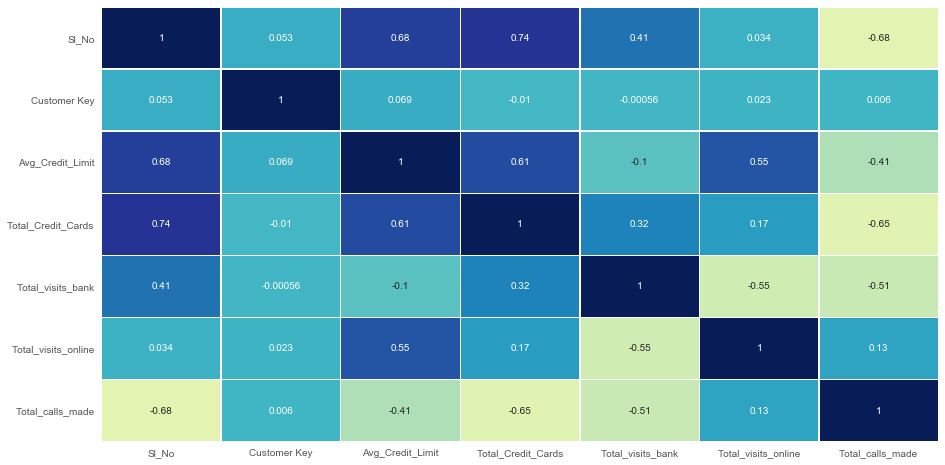

In [791]:
# Both positive and negative correlation exist amongst the variables
plt.figure(figsize=(15,8))

sns.heatmap(creditScaled.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

In [792]:
credit.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [793]:
# Drop variables that will not impact model and prepare dataset in the Hierarchical Clustering process
credit_km=credit.iloc[:,2:]
credit_km.head()
creditScaled_km=creditScaled.iloc[:,2:]
creditScaled_km.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.74,-1.25,-0.86,-0.55,-1.25
1,0.41,-0.79,-1.47,2.52,1.89
2,0.41,1.06,-0.86,0.13,0.15
3,-0.12,0.14,-0.86,-0.55,0.15
4,1.74,0.60,-1.47,3.20,-0.20


### Create clusters using K-Means Clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

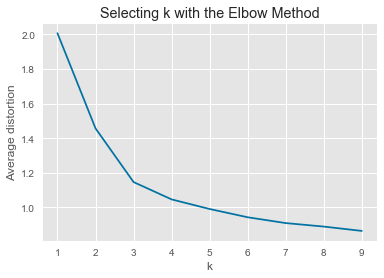

In [794]:
#Finding optimal no. of clusters using the Knee Test via the Elbow Method
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(creditScaled_km)
    prediction=model.predict(creditScaled_km)
    meanDistortions.append(sum(np.min(cdist(creditScaled_km, model.cluster_centers_, 'euclidean'), axis=1)) / creditScaled_km.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [795]:
# We select the bends at 3 and 5 from the Knee Test as possible optimal number of clusters and run sensitivities on both
# Case A, K = 3
final_model=KMeans(3)
final_model.fit(creditScaled_km)
prediction=final_model.predict(creditScaled_km)


credit_km["GROUP"] = prediction #Append the prediction to the raw dataframe
creditScaled_km["GROUP"] = prediction #Append the prediction to the scaled dataframe
print("Groups Assigned : \n")
credit_km.head()

Groups Assigned : 



C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2


In [796]:
credit_km.nunique()

Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
GROUP                    3
dtype: int64

A new column has been added to the dataframe with 3 clusters- '0', '1', '2' and the different observations assigned to them

### Analyze the distribution of the data among into the 3 clusters using boxplot for visualisation.


In [797]:
# Use Groupby to find the mean of each of the clusters
creditClust_km = credit_km.groupby(['GROUP'])
creditClust_km.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,"33,782.38",5.52,3.49,0.98,2.00
1,"12,174.11",2.41,0.93,3.55,6.87
2,"141,040.00",8.74,0.60,10.90,1.08


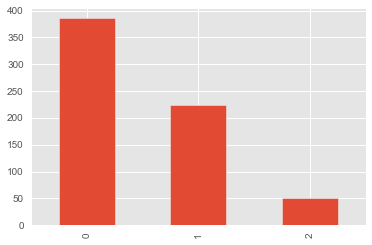

In [798]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.value_counts(credit_km["GROUP"]).plot(kind="bar")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002EBAAE9C748>,
      dtype=object)

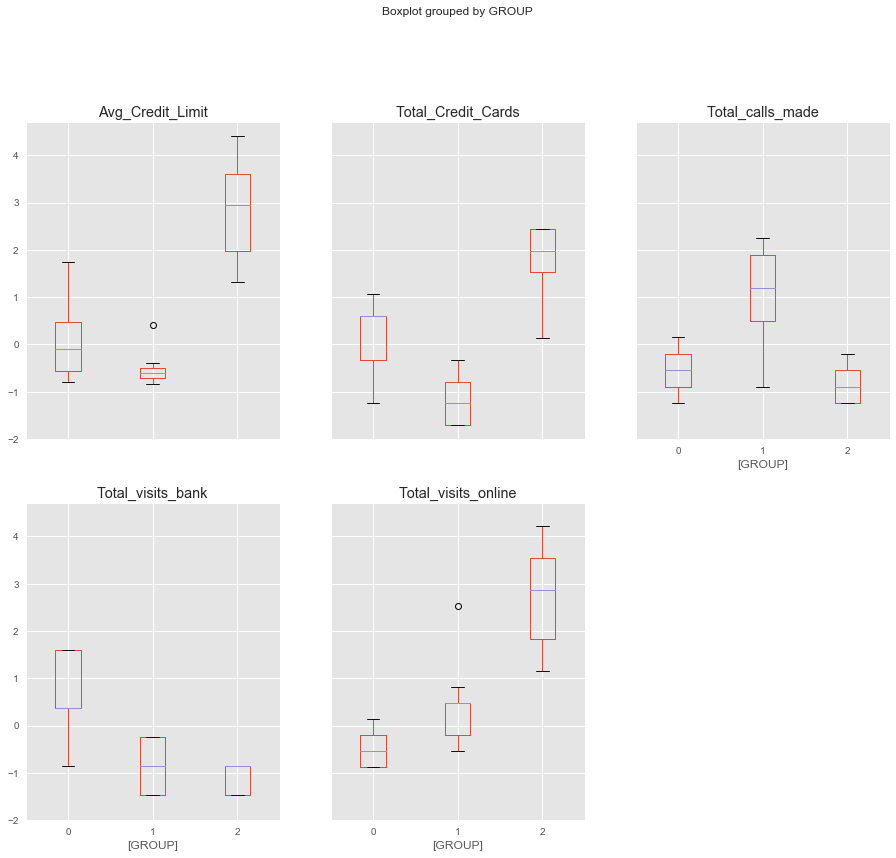

In [800]:
# Visualise the clusters using the scaled dataframe
creditScaled_km.boxplot(by='GROUP', layout = (3,3),figsize=(15,20))

### Create clusters using Hierachical Clustering

In [801]:
# Drop variables that will not impact model and prepare dataset in the Hierarchical Clustering process
credit_hc=credit.iloc[:,2:]
credit_hc.head()
creditScaled_hc=creditScaled.iloc[:,2:]
creditScaled_hc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.74,-1.25,-0.86,-0.55,-1.25
1,0.41,-0.79,-1.47,2.52,1.89
2,0.41,1.06,-0.86,0.13,0.15
3,-0.12,0.14,-0.86,-0.55,0.15
4,1.74,0.60,-1.47,3.20,-0.20


In [802]:
model_hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model_hc.fit(creditScaled_hc)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [803]:
credit_hc['labels'] = model_hc.labels_
creditScaled_hc['labels'] = model_hc.labels_
credit_hc.head(10)
creditScaled_hc.head()

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
0,1.74,-1.25,-0.86,-0.55,-1.25,0
1,0.41,-0.79,-1.47,2.52,1.89,2
2,0.41,1.06,-0.86,0.13,0.15,0
3,-0.12,0.14,-0.86,-0.55,0.15,0
4,1.74,0.60,-1.47,3.20,-0.20,1


In [804]:
creditClust_hc = credit_hc.groupby(['labels'])
creditClust_hc.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
labels,,,,,
0,"33,713.18",5.51,3.49,0.98,2.01
1,"141,040.00",8.74,0.60,10.90,1.08
2,"12,197.31",2.40,0.93,3.56,6.88


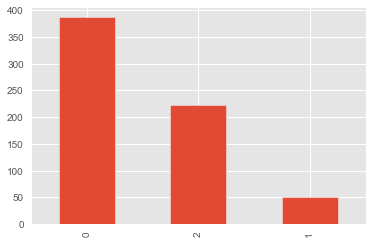

In [806]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.value_counts(credit_hc["labels"]).plot(kind="bar")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002EBAAEFB588>,
      dtype=object)

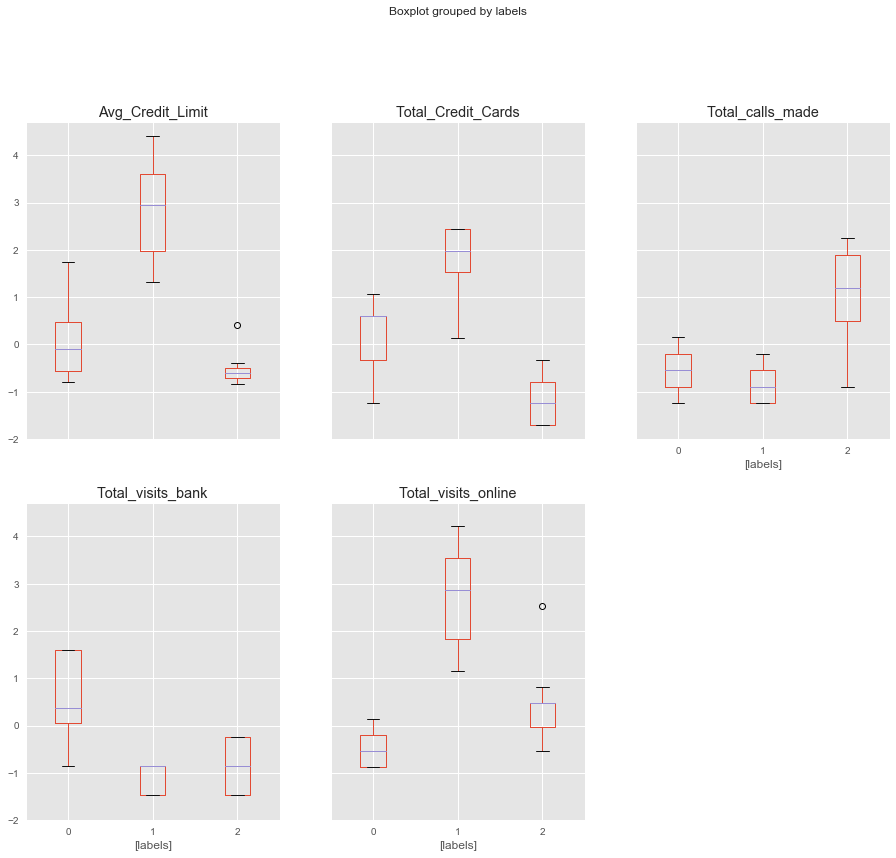

In [807]:
# Visualise the clusters using the scaled dataframe
creditScaled_hc.boxplot(by='labels', layout = (3,3),figsize=(15,20))

Using different linkages, We derive the cophenet index- a correlation measure between the distance of points in feature space and distance on dendrogram

In [808]:
#Import relevant libraries for this task
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [811]:
#Use average as linkage metric and distance as Eucledian
Z = linkage(creditScaled_hc, metric='euclidean', method='average') # generate the linkage matrix
c, coph_dists = cophenet(Z , pdist(creditScaled_hc))

c #print the cophenet index for this linkage

0.9252387749820263

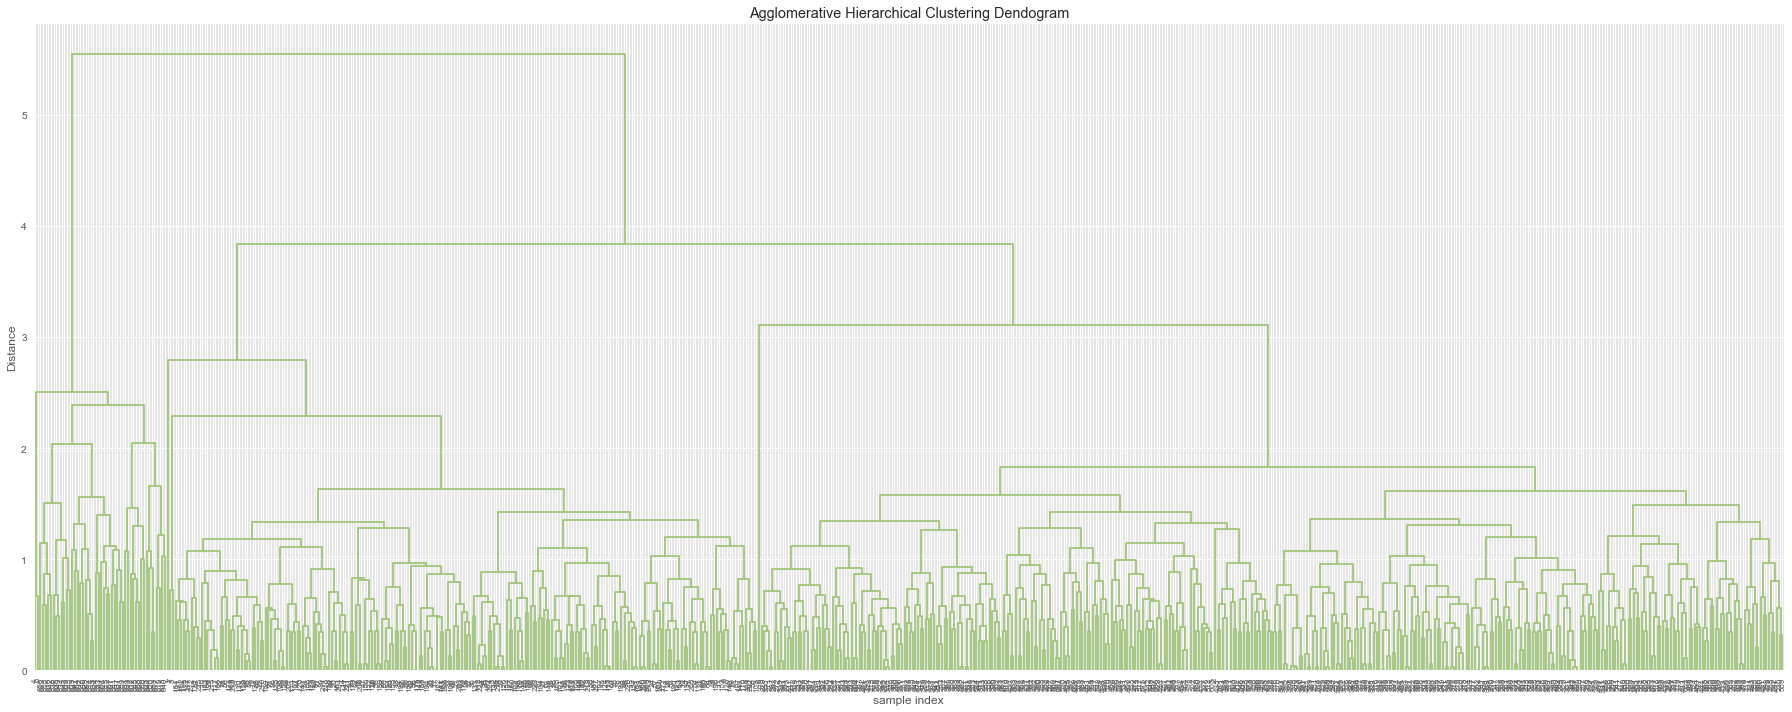

In [812]:
# Print Dendogram for the average linkage method
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [813]:
#Use ward as linkage metric and distance as Eucledian
Z = linkage(creditScaled_hc, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(creditScaled_hc))

c #print the cophenet index for this linkage

0.8170227112271451

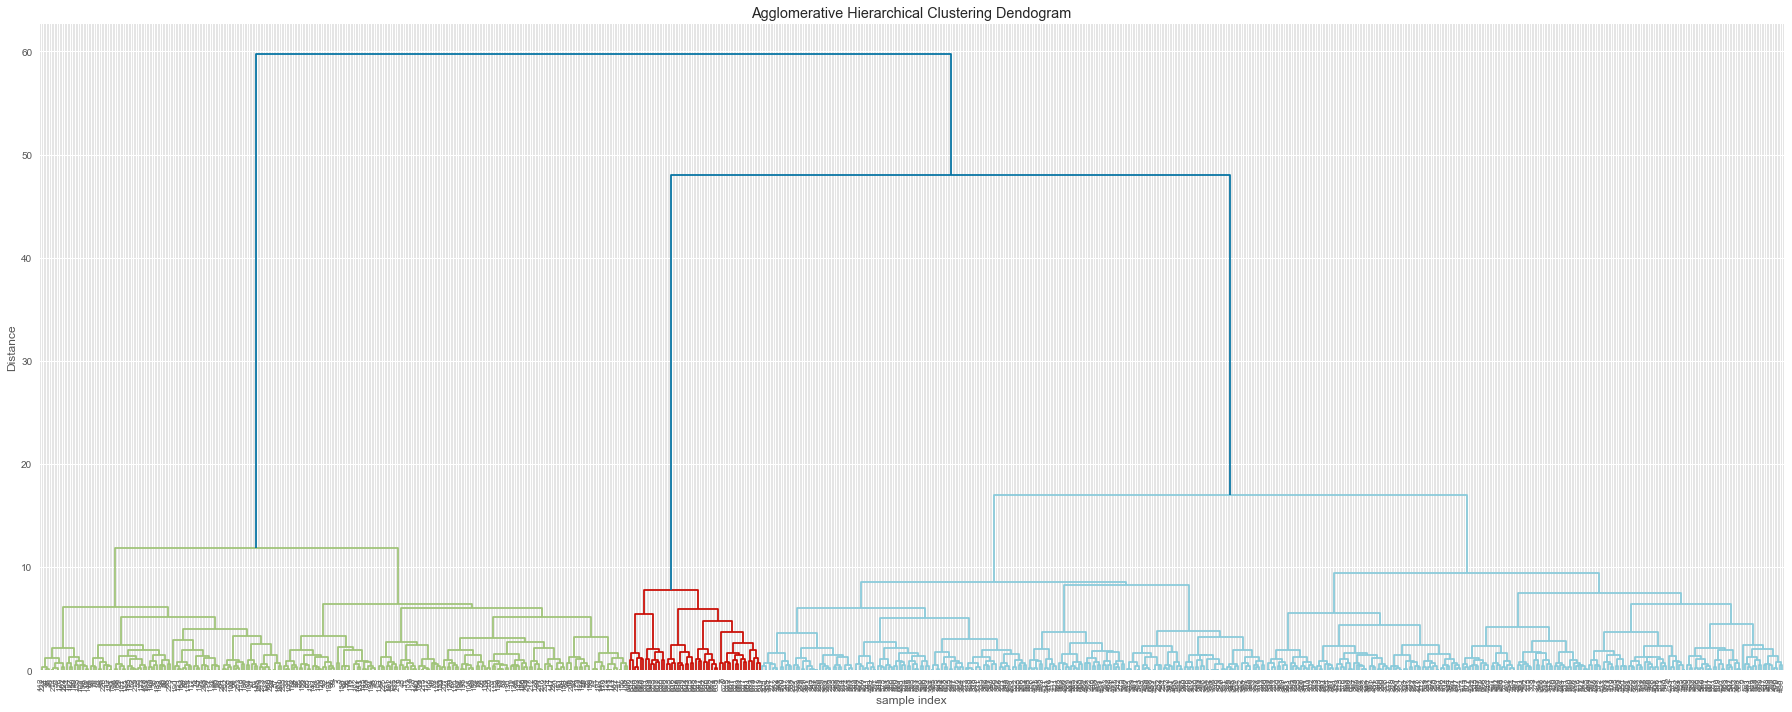

In [814]:
# Print Dendogram for the ward linkage method
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [815]:
#Use complete as linkage metric and distance as Eucledian
Z = linkage(creditScaled_hc, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(creditScaled_hc))

c #print the cophenet index for this linkage

0.9181204166982053

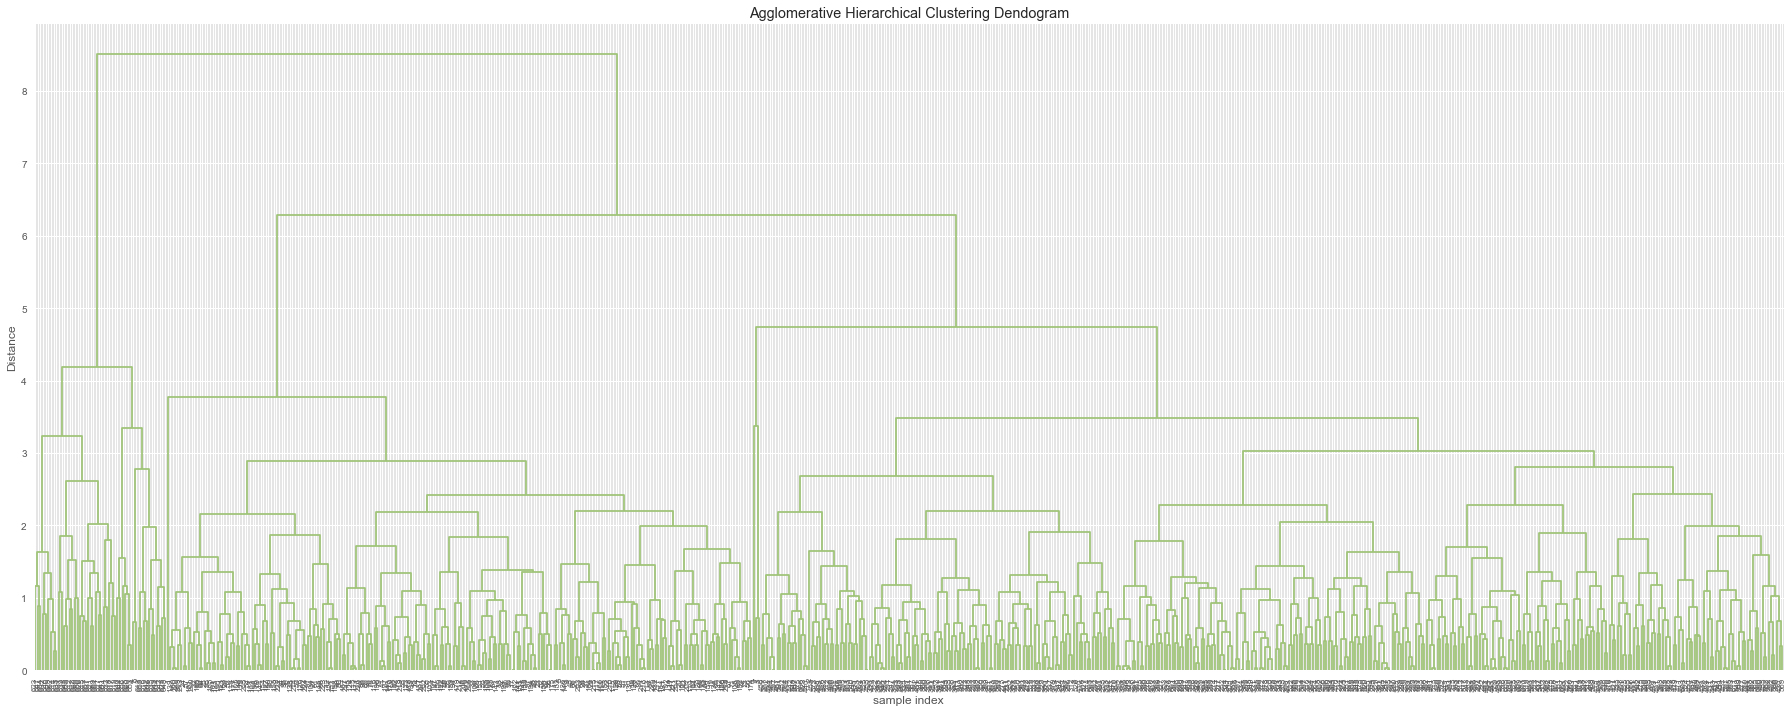

In [816]:
# Print Dendogram for the complete linkage method
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [817]:
#Use single as linkage metric and distance as Eucledian
Z = linkage(creditScaled_hc, metric='euclidean', method='single')
c, coph_dists = cophenet(Z , pdist(creditScaled_hc))

c #print the cophenet index for this linkage

0.8464568634426607

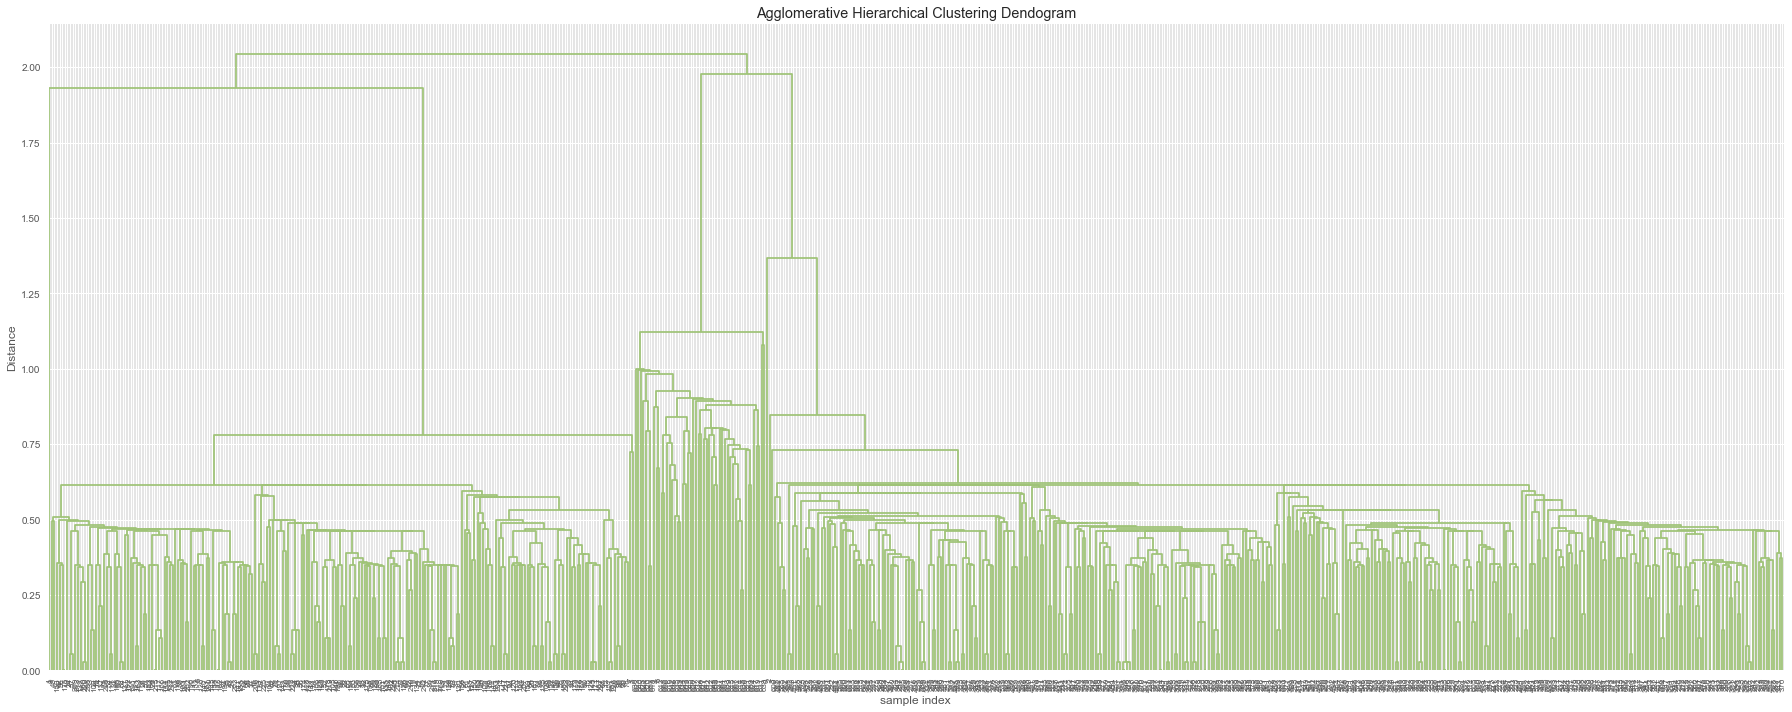

In [818]:
# Print Dendogram for the single linkage method
plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

With a cophenetic correlation of 0.9252, the 'Average' linkage is closest to 1 and thus the best of all the four linkages run

#### Dendogram Truncation

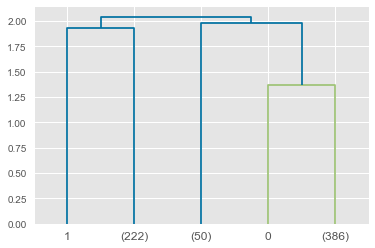

In [819]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
)
plt.show()

In [824]:
#Selecting a Distance Cut-Off i.e Determining the Number of Clusters
max_d = 3.5 # this value produces 3 clusters

In [827]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([3, 2, 3, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

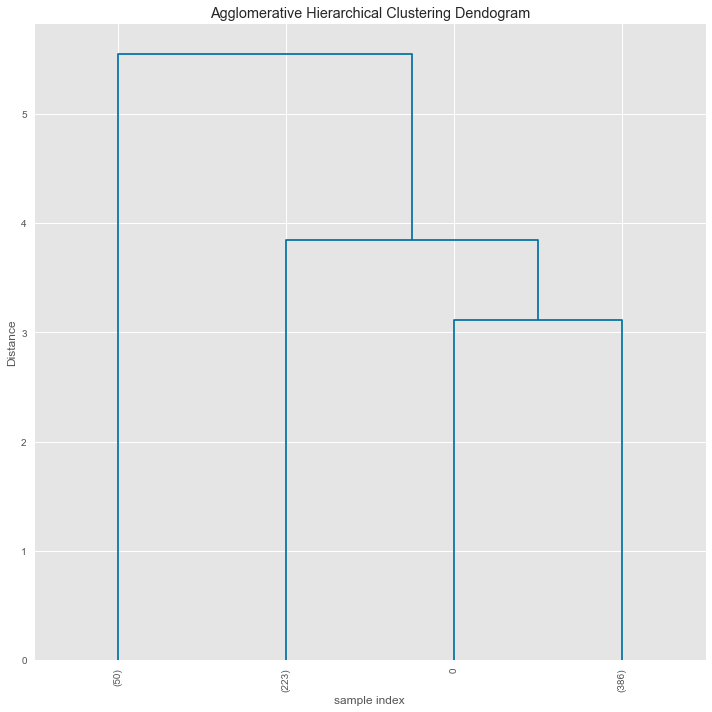

In [828]:
# Final Dendogram using the average linkage method

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(creditScaled_hc, 'average')
dendrogram(Z,leaf_rotation=90.0,p=4,color_threshold=1.5,leaf_font_size=10,truncate_mode='lastp')
plt.tight_layout()

 ### Calculate average silhouette score for both methods

In [834]:
# Calculate Sihouette Score for K-means and for Hierarchical Clustering
from sklearn.metrics import silhouette_score
print(f'Silhouette Score(3 clusters) for K-Means Clustering: {silhouette_score(creditScaled_km, prediction)}')
print(f'Silhouette Score(3 clusters) for Hierachical Clustering: {silhouette_score(creditScaled_hc, clusters)}')

Silhouette Score(3 clusters) for K-Means Clustering: 0.5411228112448502
Silhouette Score(3 clusters) for Hierachical Clustering: 0.590990473596407


### Compare K-means clusters with Hierarchical clusters

1) The Silhouette Score is closer to 1 in the Hierachical(0.591) than in K-Means (0.5411) with similar number of clusters(3).
Thus Hierachical is the better algorithm to efficently group the customers for a targetted marketing

2) K-Means and Hierachical Clustering essentially produce the same clustering segments

3) K-means clusters are also better than Hierarchical clusters in segmenting large dataset and in visualisation of the clusters

In [835]:
# create a single dataframe with columns containing K-means and Hierachical clusters
credit_ClustComp = credit.copy() # create a copy of the raw dataframe
credit_ClustComp["GROUP"]= prediction # append K-means Clusters into this Single Dataframe
credit_ClustComp["labels"]= model_hc.labels_ #append Hierachical Clusters in this the Single Dataframe
credit_ClustComp.head()
credit_ClustComp.shape

(660, 9)

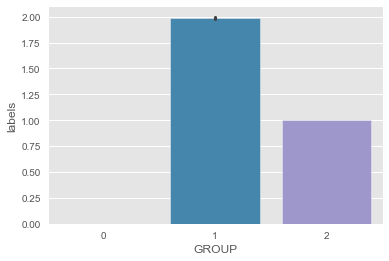

In [836]:
#compare the clusters generated by K-means with that from Hierachical clustering
sns.barplot(credit_ClustComp["GROUP"], credit_ClustComp["labels"]);

### Cluster Analysis

Key Questions: 
1. How many different segments of customers are there?
2. How are these segments different from each other? 
3. What are your recommendations to the bank on how to better market to and service these customers? 

##### Customer Segments
There are 3 segments(clusters) of customers:
- Segment '0'
- Segment '1'
- Segment '2'

##### Segment Comparsion
- Segment '1' have Customers with highest average credit card limits and average Total Credit Cards
- Segment '0' have the second highest and Segment '2' is least 
- Segment '1' customers visit the bank the least and also make less phone calls. But tend to interact more with the bank via online platforms- These could be working class professionals who have little or no time to vist the bank but choose online means instead
- Segment '0' customers visit the bank more than other segments and interact the least on online medium- these may be 'senior' or the aged populace who are not very comfortable in the use of technology.
- Segment '2' customers make the most phone calls and second highest in online interactions - these may be students and millenials with lesser income
- Customers who made calls tend to have lower average credit card limit
- Customers that have higher average credit card limit tend to visit the bank less.
- Customers who have lower average number of credit cards have lower credit card limit
- Higher Spenders make the less calls on the average

##### Recommendations
- The personalised campaigns by the Marketing Team should primarily target customers who interact with the Bank via online platform and introduce end-to-end service delivery online.
- The customer experience of those who visit the bank physically should be improved- attending to them quickly and provide comfortable waiting rooms should be encouraged 
- Support services to online customers should be greatly improved
- More online media campaign should be done to target users of those platfroms as potential 'new customers'
- Bank products should be printed and hard copies offered to customers that visit physically
- The targeted Marketing campaign should incorporate the use of Mobile means like phone calls.
- Service Delivery via all channels of customer interactions with the bank should be improved.